In [19]:
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2
from scripts.parsing_utils import *
from utils.utils import *
from scripts.parse_results import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
BASE_DIR = "/home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/default/"
RES_DIR = BASE_DIR + "min_qerrs"
RES_DIR2 = BASE_DIR + "final_results3"
#RES_DIR3 = BASE_DIR + "priority"
#RES_DIR3 = BASE_DIR + "flow_weight"
#RES_DIR3 = BASE_DIR + "sample_bitmaps"

RES_DIRS = []
RES_DIRS.append(RES_DIR)
RES_DIRS.append(RES_DIR2)
#RES_DIRS.append(RES_DIR3)

#ERRORS = ["qerr", "plan_pg_err", "jerr", "cm1_jerr"]
ERRORS = ["qerr", "jerr", "cm1_jerr"]

FN_TMP = "{ALT_TYPE}-{LOSS_TYPE}-{SAMPLES_TYPE}.pdf"
SAVE_DIR = "./figures/loss_function_alternatives/"
make_dir(SAVE_DIR)

In [10]:
dfs = []
for res_dir in RES_DIRS:
    df = get_summary_df(res_dir)
    if "final_results2" in res_dir:
        df = df[df.feat_rel_pg_ests_onehot == 1]
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)

final_runs-nested_loop_index7-mscn-df:10-nn:2:512-loss:mse-0.0--D0.1-106
512
20
******
jerr not found for:  /home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/default/min_qerrs/final_runs-nested_loop_index7-mscn-df:10-nn:2:512-loss:mse-0.0--D0.1-106
final_runs-nested_loop_index7-mscn-df:10-nn:2:512-loss:mse-0.0--D0.1-329
512
20
******
jerr not found for:  /home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/default/min_qerrs/final_runs-nested_loop_index7-mscn-df:10-nn:2:512-loss:mse-0.0--D0.1-329
final_runs-nested_loop_index7-mscn-df:10-nn:2:512-loss:mse-0.0--D0.1-815
512
20
******
jerr not found for:  /home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/default/min_qerrs/final_runs-nested_loop_index7-mscn-df:10-nn:2:512-loss:mse-0.0--D0.1-815
final_runs-nested_loop_index7-mscn-df:10-nn:2:512-loss:mse-0.0--D0.1-110
512
20
******
jerr not found for:  /home/pari/learned-cardinalities/all_results/i

In [11]:
def col_rename(row):
    #return '_'.join(row.values.astype(str)
    if np.isnan(row[1]) and row[0] == "mse":
        return "1.0"
    elif "mse" in row[0]:
        return str(row[1])
    else:
        return "Flow Loss"

In [12]:
df = df[df["template"] == "all"]
#df = df[df["num_tables"] == "all"]
df = df[df["summary_type"] == "mean"]
#df = df[df["summary_type"] == "percentile:50"]

cols = ["loss_func", "min_qerr"]
#cols = ["loss_func", "sample_bitmap"]

#col_renames = {}
#col_renames["mse_nan"] = ""
df['alg_name'] = df[cols].apply(lambda row: col_rename(row), axis=1)

LOSS_FUNCS = {}
LOSS_FUNCS["mse"] = "Q-Error"
LOSS_FUNCS["flow_loss2"] = "Flow Loss"
df["loss_func"] = df[["loss_func"]].apply(lambda row: LOSS_FUNCS[row["loss_func"]], axis=1)

df = df[df["alg_name"] != "true"]
df = df[df["alg_name"] != "postgres"]
df = df[df["weight_decay"] == 0.1]

## other ones
#print("only considering partition 2")
#df = df[df.partition == 2]

In [13]:
print(set(df.alg_name))

{'2.0', '1.0', '64.0', '8.0', '32.0', '4.0', '16.0', 'Flow Loss'}


In [22]:
#HUE_COLORS = None
#ORDER = ["flow_loss2_nan", "mse_nan", "mse_1.5", "mse_2.5", "mse_5.0", "mse_10.0", "mse_20.0", "mse_100.0"]
#ORDER = ["flow_loss2_nan", "mse_nan", "mse_2.5", "mse_5.0", "mse_10.0", "mse_25.0", "mse_100.0"]

## ORDER with min_qerr, and weight decay runs
#ORDER = ["flow_loss2_nan_0.1", "mse_nan_0.1", "mse_1.0_1.0", "mse_1.0_2.0", "mse_1.0_10.0", "mse_2.5_0.1", "mse_5.0_0.1", 
#        "mse_10.0_0.1", "mse_20.0_0.1", "mse_100.0_0.1"]

#ORDER = ["flow_loss2_nan", "mse_nan", "mse_1.0"]
#ORDER = None

HUE_COLORS = {}
HUE_COLORS["Q-Error"] = "green"
HUE_COLORS["Flow Loss"] = "blue"
ORDER = ["mse_1.0", "mse_1.5", "mse_2.5", "mse_5.0", "mse_10.0", "mse_20.0", "mse_100.0", "flow_loss"]
HUE_ORDER = [ORDER]

ORDER2 = ["1.0", "2.0", "4.0", "8.0", "16.0", "32.0", "64.0", "Flow Loss"]

# Naming Scheme
### loss_{min_qerr}
### nan refers to baselines

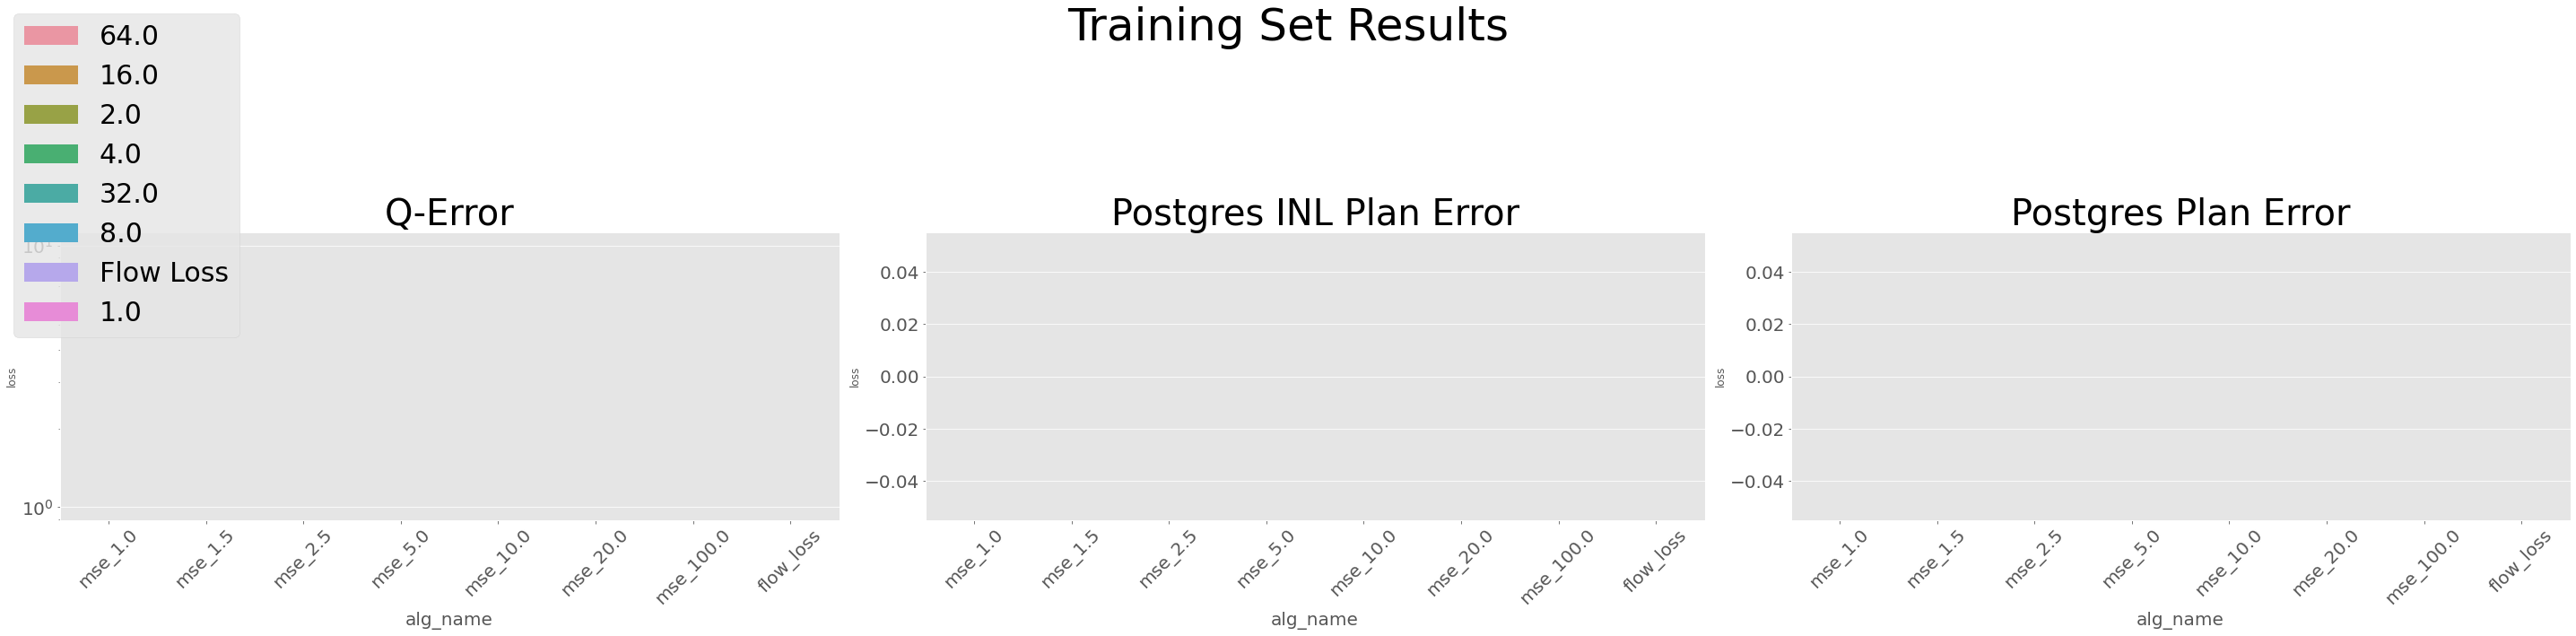

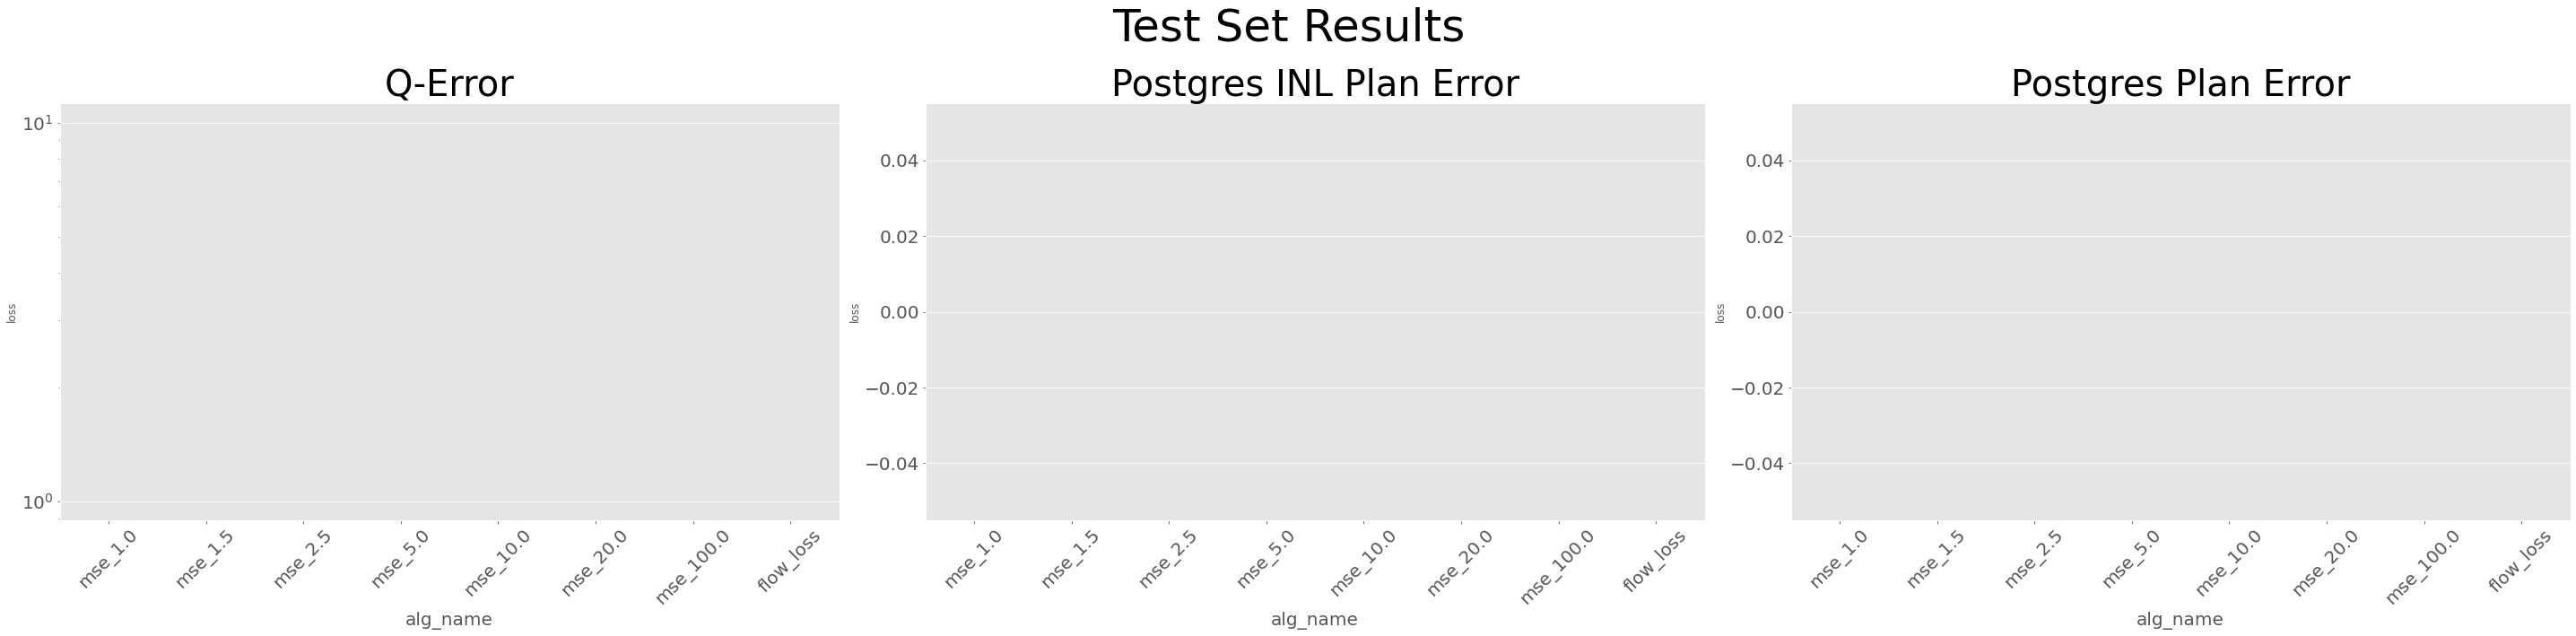

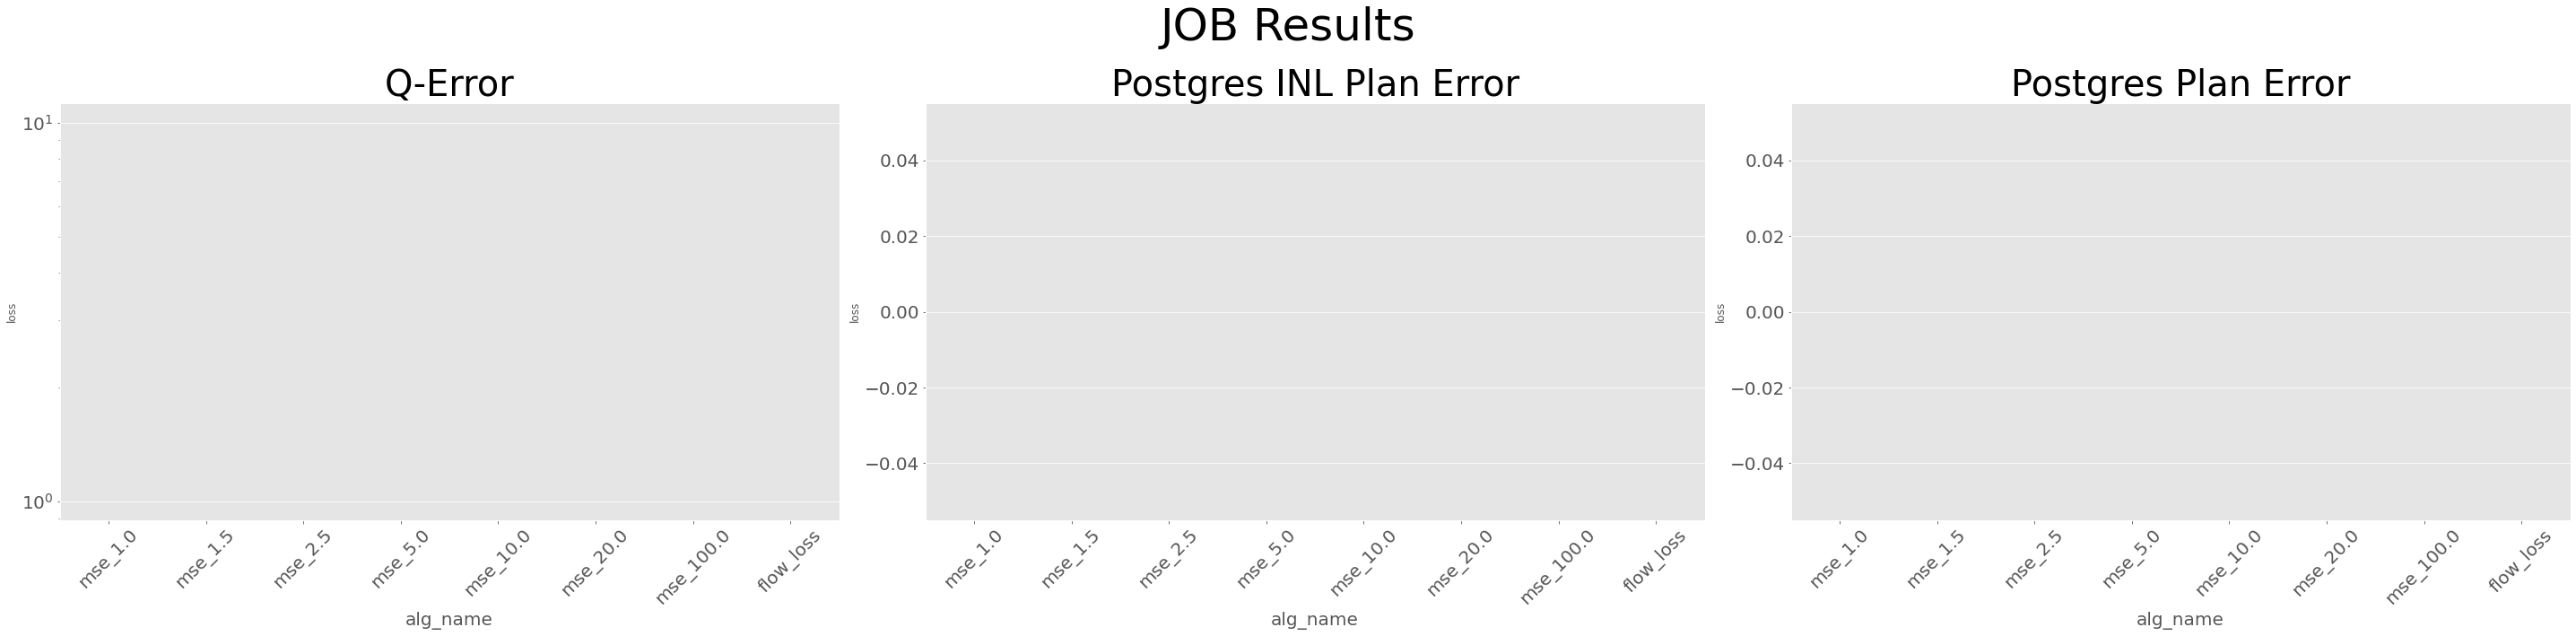

In [23]:
construct_summary_final(df, "train", "Training Set Results", ERRORS, HUE_COLORS=None, ORDER=ORDER, 
                        HUE_ORDER=None)
construct_summary_final(df, "test", "Test Set Results", ERRORS, HUE_COLORS=None, ORDER=ORDER, 
                        HUE_ORDER=None)
construct_summary_final(df, "job", "JOB Results", ERRORS, HUE_COLORS=None, ORDER=ORDER, 
                        HUE_ORDER=None)

In [24]:
YLABELS = {}
YLABELS["qerr"] = "Q-Error"
YLABELS["cm1_jerr"] = "Postgres Plan Error"

def bar_chart_summary_qerr_thresh(df, samples_type, err_type):
    #fig, ax = plt.subplots(1, figsize=(5,4))
    plt.figure(figsize=(5,4))
    plt.style.use('ggplot')   

    df = df[df.samples_type == samples_type]
    df = df[df.loss_type == err_type]
    sns.barplot(data=df, x="alg_name", y="loss", hue="loss_func", order=ORDER2, dodge=False,
                palette=HUE_COLORS)
    plt.xlabel("Loss Function")
    plt.ylabel(YLABELS[err_type])
    #plt.legend("Loss Function")
    #plt.title("Unique Subquery Combinations, Grouped by Importance")
    plt.yscale("log")
    fn = FN_TMP.format(SAMPLES_TYPE = samples_type,
                       LOSS_TYPE = err_type,
                        ALT_TYPE = "qerror-thresh")
    fn = SAVE_DIR + fn
    plt.savefig(fn)
    plt.show()

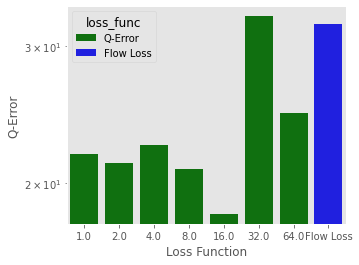

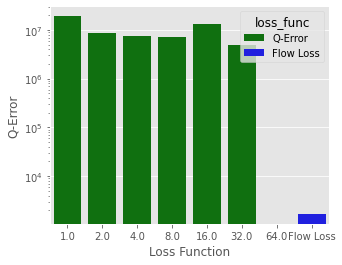

In [25]:
bar_chart_summary_qerr_thresh(df, "test", "qerr")
bar_chart_summary_qerr_thresh(df, "job", "qerr")

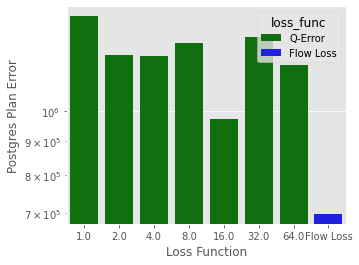

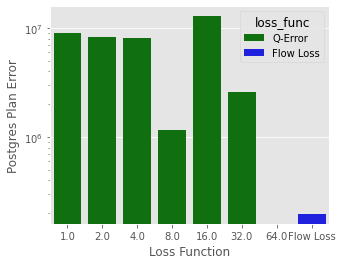

In [26]:
bar_chart_summary_qerr_thresh(df, "test", "cm1_jerr")
bar_chart_summary_qerr_thresh(df, "job", "cm1_jerr")

In [194]:
tmp = df[df.loss_func == "Flow Loss"]
print(tmp.head(5))
tmp = tmp[tmp.loss_type == "qerr"]
print(set(tmp["hidden_layer_size"]))
print(set(tmp["cost_model"]))
print(set(tmp["flow_features"]))
print(set(tmp["weight_decay"]))
print(set(tmp["loss_func"]))

     loss_type          loss summary_type template  num_samples samples_type  \
9600      qerr  4.466952e+01         mean      all      1760573        train   
9672      qerr  4.810727e+01         mean      all      1643410         test   
9744      qerr  3.734609e+02         mean      all        31512          job   
9760      jerr  1.876294e+05         mean      all          105          job   
9776      jerr  1.563078e+06         mean      all         7594         test   

            query_directory          cost_model join_loss_data_file  \
9600  ./our_dataset/queries  nested_loop_index7                None   
9672  ./our_dataset/queries  nested_loop_index7                None   
9744  ./our_dataset/queries  nested_loop_index7                None   
9760  ./our_dataset/queries  nested_loop_index7                None   
9776  ./our_dataset/queries  nested_loop_index7                None   

           exp_prefix  ... use_svd  num_singular_vals  num_bins cl_recompute  \
9600  diff_p